In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
BATCH_SIZE = 32 
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    seed = 123
)

Found 2152 files belonging to 3 classes.


In [5]:
labelName = dataset.class_names
labelName

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


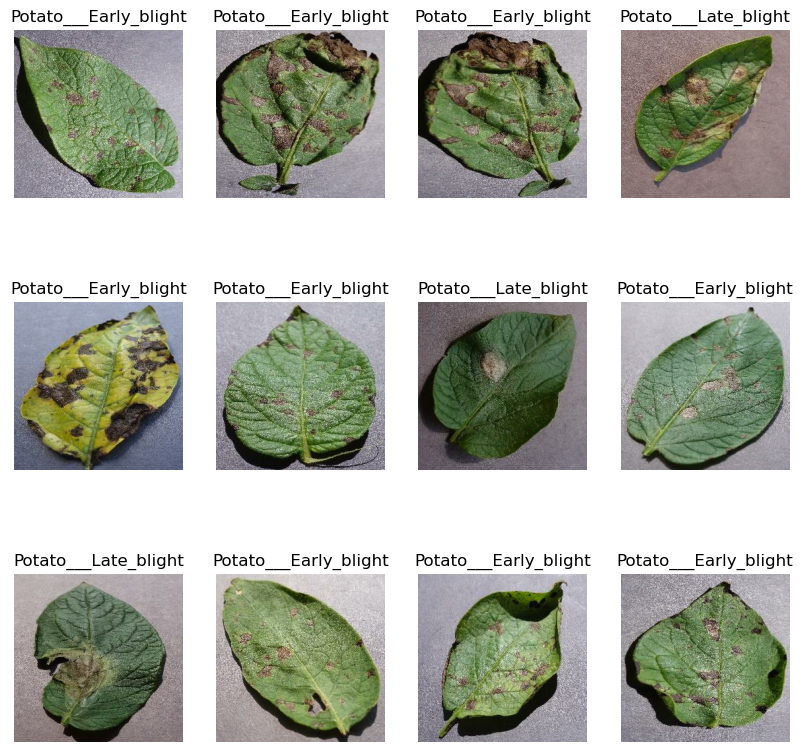

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(labelName[label_batch[i]])
        

In [8]:
type(label_batch)

tensorflow.python.framework.ops.EagerTensor

In [9]:
len(dataset)

68

In [10]:
train_siz = .8
len(dataset)*train_siz

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
val_ds = test_ds.take(7)
test_ds = test_ds.skip(7)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
normalize = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1/255)
])

In [15]:
augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(.2)
])

In [50]:
train_ds = train_ds.map(
    lambda x,y: (augmentation(x, training = True), y )
).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [52]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_class = 3
model = models.Sequential([
    normalize,
    layers.Conv2D(32,3, activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,3, activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(num_class, activation = 'softmax')
])
model.build(input_shape=input_shape)

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [54]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50,
    verbose = 1,
    batch_size=BATCH_SIZE
)

Epoch 1/50
54/54 [==============================] - 29s 276ms/step - loss: 0.9068 - accuracy: 0.5029 - val_loss: 0.7846 - val_accuracy: 0.6161
Epoch 2/50
54/54 [==============================] - 9s 168ms/step - loss: 0.6102 - accuracy: 0.7124 - val_loss: 0.5408 - val_accuracy: 0.7812
Epoch 3/50
54/54 [==============================] - 9s 166ms/step - loss: 0.4302 - accuracy: 0.8270 - val_loss: 0.3073 - val_accuracy: 0.8929
Epoch 4/50
54/54 [==============================] - 8s 144ms/step - loss: 0.2496 - accuracy: 0.9039 - val_loss: 0.2199 - val_accuracy: 0.9018
Epoch 5/50
54/54 [==============================] - 9s 161ms/step - loss: 0.2267 - accuracy: 0.9074 - val_loss: 0.2464 - val_accuracy: 0.9107
Epoch 6/50
54/54 [==============================] - 9s 163ms/step - loss: 0.1438 - accuracy: 0.9491 - val_loss: 0.1367 - val_accuracy: 0.9420
Epoch 7/50
54/54 [==============================] - 10s 185ms/step - loss: 0.1085 - accuracy: 0.9612 - val_loss: 0.1093 - val_accuracy: 0.9688
Epoc

In [57]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 4s 162ms/step - loss: 0.0303 - accuracy: 0.9900


In [58]:
scores

[0.030291887000203133, 0.9900000095367432]

In [59]:
history

In [60]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
type(history.history['loss'])

list

In [64]:
len(history.history['loss'])

50

In [65]:
accuracy = history.history['accuracy']
loss = history.history['loss']
accu_val = history.history['val_accuracy']
loss_val = history.history['val_loss']

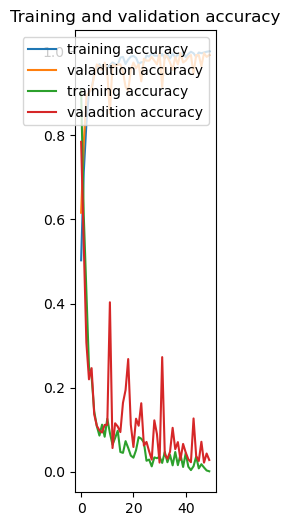

In [81]:
import seaborn as sns
plt.figure(figsize=(4,6))
plt.subplot(1,2,1)
plt.title('Training and validation accuracy')
sns.lineplot(x = range(50), y = accuracy, label = 'training accuracy')
sns.lineplot(x = range(50), y = accu_val, label = 'valadition accuracy')
plt.legend(loc='lower right')
sns.lineplot(x = range(50), y = loss, label = 'training accuracy')
sns.lineplot(x = range(50), y = loss_val, label = 'valadition accuracy')
plt.legend(loc='upper right')

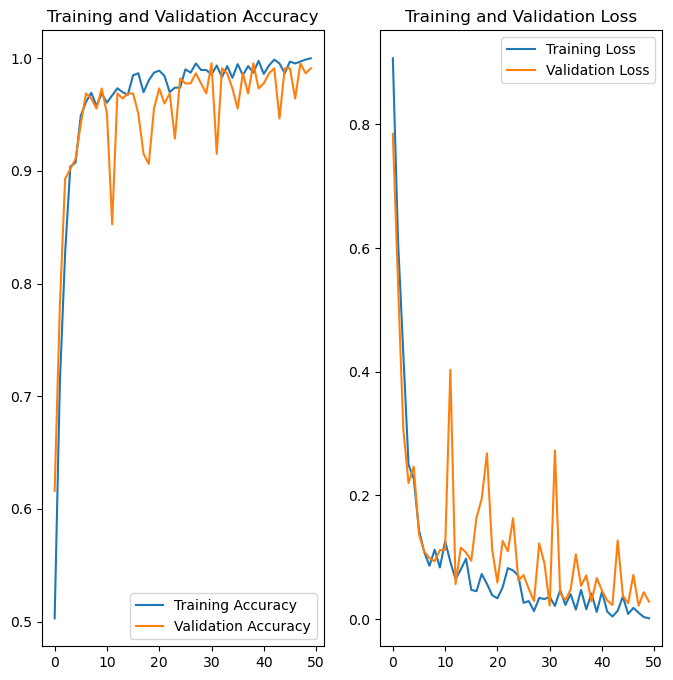

In [83]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), accu_val, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), loss_val, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

printing first image 
acutual printing label Potato___Late_blight
1/1 [==============================] - 0s 152ms/step
Potato___Late_blight


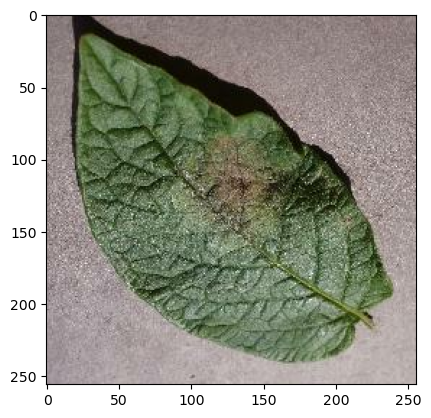

In [91]:
import numpy as np
for images_batch , label_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print('printing first image ')
    plt.imshow(first_image)
    print('acutual printing label',labelName[first_label])

    batch_pred = model.predict(images_batch)
    print(labelName[np.argmax(batch_pred[0])])


In [110]:
def predict(model, img):
    img_array =  tf.convert_to_tensor(img, dtype=tf.float32)
    img_array = tf.expand_dims(img_array, axis =0 )
    pred = model.predict(img_array)
    pred_class = labelName[np.argmax(pred[0])]
    confidence = round(100*np.max(pred[0]),2)
    return pred_class, confidence

1/1 [==============================] - 0s 27ms/step


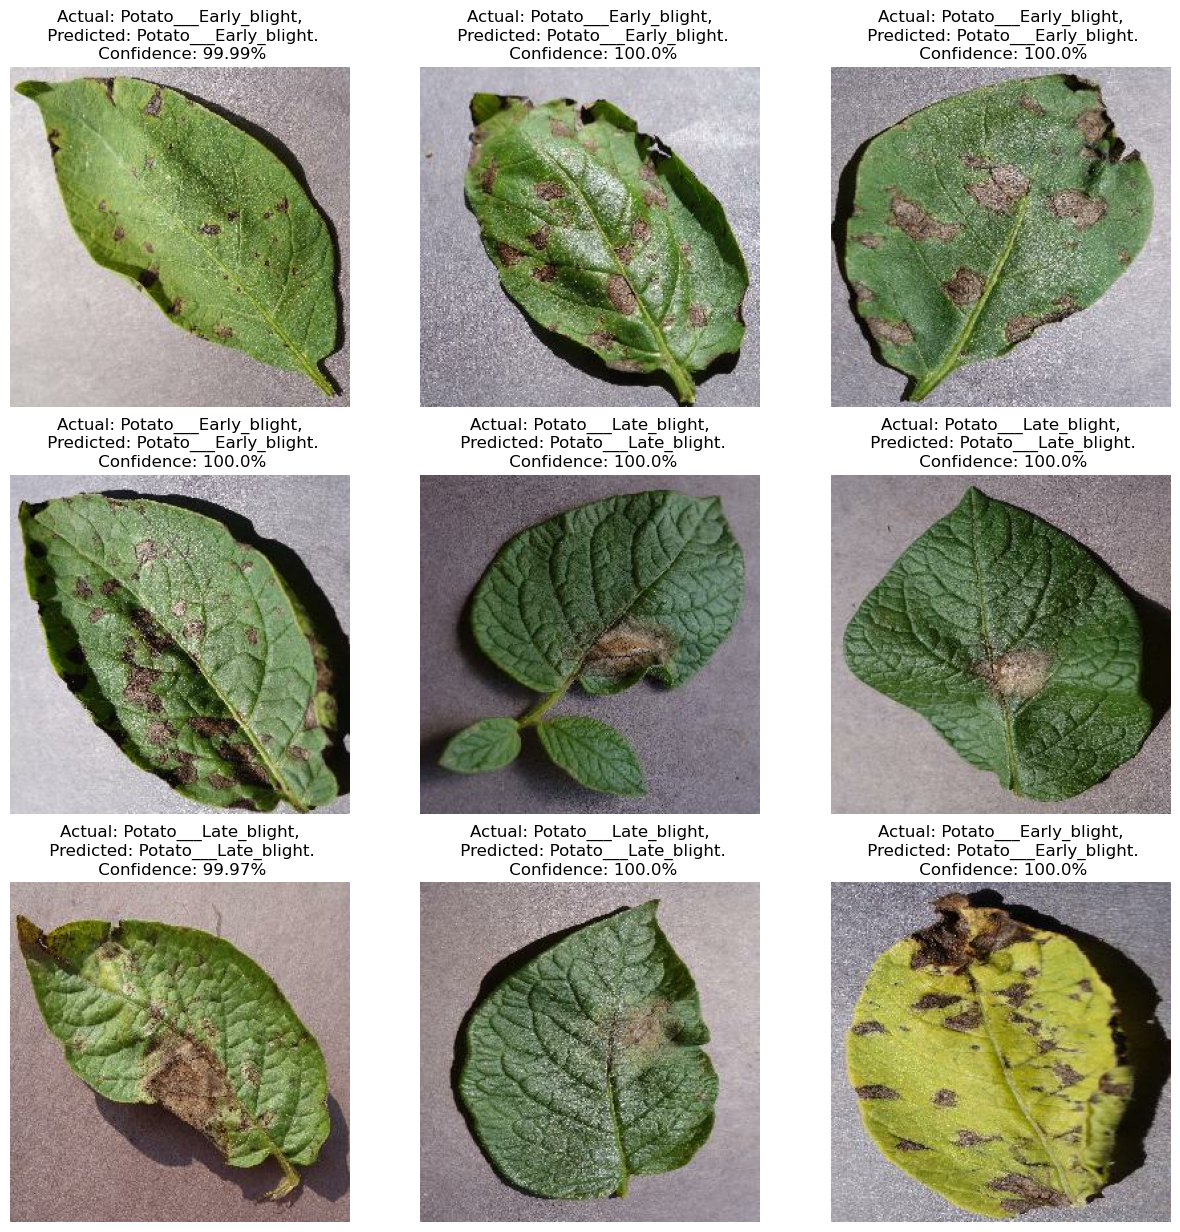

In [122]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = labelName[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [134]:
import os 
model_version = max([int(i) for i in os.listdir('models')+[0]])+1
model.save(f'models/{model_version}')

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


In [135]:
model.save("../potatoes.h5")